**Direct classification of images using *the best* two pre-trained Top-1 accuracy Keras models**

Overview:

*   Example of using **the best** two Top-1 accuracy [pre-trained deep learning models](https://keras.io/api/applications/) to classify an image
*   [Image 1 (Art work from Art Institue Chicago)](https://www.artic.edu/artworks/21023/buddha-shakyamuni-seated-in-meditation-dhyanamudra)
*   [Image 2 (The Oculus buiilding in Warwick Uni.)](https://constructingexcellence.org.uk/wp-content/uploads/2017/08/275_12_image_Oculus-Warwick-BGS-QJEL-01.jpg)

In [7]:
import numpy as np
# import the models for further classification experiments
from tensorflow.keras.applications import (
        inception_resnet_v2,
        nasnet
    )

# init the models
inception_model = inception_resnet_v2.InceptionResNetV2(weights='imagenet')
nasnetlarge_model = nasnet.NASNetLarge(weights='imagenet')

PIL image size (299, 299)


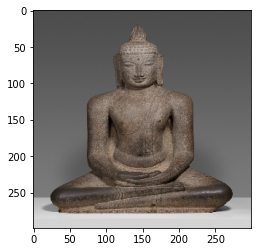

In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions

# assign the image path for the classification experiments
# filename = './british-museum-exterior_1'
# filename = './oculus_building.jpg'
# filename = './06s_1501.jpg'
filename = './Buddha.jpg'

# load an image in PIL format
original_inception = load_img(filename, target_size=(299, 299)) # for input into inception
original_nasnet = load_img(filename, target_size=(331, 331)) # for input into nasnet
print('PIL image size',original_inception.size)
plt.imshow(original_inception)
plt.show()

# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image_inception = img_to_array(original_inception)
numpy_image_nasnet = img_to_array(original_nasnet)
## plt.imshow(np.uint8(numpy_image_inception))
## plt.show()
## print('numpy array size',numpy_image_inception.shape)

# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch_inception = np.expand_dims(numpy_image_inception, axis=0) # for inception input
image_batch_nasnet = np.expand_dims(numpy_image_nasnet, axis=0) # for nasnet input
## print('image batch size', image_batch_nasnet.shape)
## plt.imshow(np.uint8(image_batch_nasnet[0]))


Important: Since the emphasis is on top-1 accuracy for each model per image, we need to select the keras model with highest top 1 accuracy: which is **NASNETLarge**

**Let's try InceptionResNetV2 prediction**

In [9]:
# prepare the image for the InceptionResNetV2 model
processed_image_inception = inception_resnet_v2.preprocess_input(image_batch_inception.copy())
# get the predicted probabilities for each class
predictions_inception = inception_model.predict(processed_image_inception)
# print predictions
# convert the probabilities to class labels
# we will get top 5 predictions which is the default. However, we are interested in only Top-1 accuracy lables and probabilities.
label_inception = decode_predictions(predictions_inception, top =1)
# print InceptionResNetV2 model predictions
print('Top-1 Accuracy prediction of InceptionResNetV2 pre-trained model:')
for prediction_id in range(len(label_inception[0])):
    print(label_inception[0][prediction_id])

Top-1 Accuracy prediction of InceptionResNetV2 pre-trained model:
('n03903868', 'pedestal', 0.6669443)


**Let's try NASNETLarge prediction**

In [10]:
# prepare the image for the NASNetLarge model
processed_image_nasnet = nasnet.preprocess_input(image_batch_nasnet.copy())

# get the predicted probabilities for each class
predictions_nasnet = nasnetlarge_model.predict(processed_image_nasnet)
# print predictions
# convert the probabilities to class labels
# we will get top 5 predictions which is the default but my proposal is for us to just focus on top-1 accuracy. We are interested in only Top-1 accuracy lables and probabilities.
label_nasnetlarge = decode_predictions(predictions_nasnet, top =1)
# print nasnetlarge predictions
print('Top-1 Accuracy prediction of NASNetLarge pre-trained model:')
for prediction_id in range(len(label_nasnetlarge[0])):
    print(label_nasnetlarge[0][prediction_id])

Top-1 Accuracy prediction of NASNetLarge pre-trained model:
('n03903868', 'pedestal', 0.700898)
